In [1]:
import pandas as pd

file_path = "./MY2022 Fuel Consumption Ratings.csv"
data = pd.read_csv(file_path)
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

def modelBuilder(categoriesX, numericX, preprocessor):
    # Select relevant features for prediction
    X = data[categoriesX + numericX]
    y = data["CO2 Emissions(g/km)"]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Linear Regression model
    model_pipeline = make_pipeline(preprocessor, LinearRegression())
    
    # Train the model
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(mse, r2)

In [13]:
# "Make", "Model", "Vehicle Class" is words need to be vectorization to modify in model
categoriesX = ["Make", "Model", "Vehicle Class"]
numericX = ["Engine Size(L)", "Cylinders", "Fuel Consumption (City (L/100 km)", 
          "Fuel Consumption(Hwy (L/100 km))", "Fuel Consumption(Comb (L/100 km))"]

# use One-Hot Encoding to vectorize
preprocessor = ColumnTransformer(
    transformers=[
        ('categoriesX', OneHotEncoder(handle_unknown='ignore'), categoriesX)
    ], remainder='passthrough')

modelBuilder(categoriesX, numericX, preprocessor)

501.0134818308519 0.8748480866622816


In [15]:
# "Make", "Model", "Vehicle Class" is words need to be vectorization to modify in model
categoriesX = ["Make", "Model", "Vehicle Class"]
numericX = ["Engine Size(L)", "Model Year", "Cylinders", "Fuel Consumption (City (L/100 km)", 
          "Fuel Consumption(Hwy (L/100 km))", "Fuel Consumption(Comb (L/100 km))"]

# use One-Hot Encoding to vectorize
preprocessor = ColumnTransformer(
    transformers=[
        ('categoriesX', OneHotEncoder(handle_unknown='ignore'), categoriesX)
    ], remainder='passthrough')

modelBuilder(categoriesX, numericX, preprocessor)

501.0141773843671 0.874847912914755


In [19]:
# "Make", "Model", "Vehicle Class" is words need to be vectorization to modify in model
categoriesX = ["Model", "Fuel Type"]
numericX = ["Engine Size(L)", "Cylinders", "Fuel Consumption (City (L/100 km)", 
          "Fuel Consumption(Hwy (L/100 km))", "Fuel Consumption(Comb (L/100 km))"]

# use One-Hot Encoding to vectorize
preprocessor = ColumnTransformer(
    transformers=[
        ('categoriesX', OneHotEncoder(handle_unknown='ignore'), categoriesX)
    ], remainder='passthrough')

modelBuilder(categoriesX, numericX, preprocessor)

16.1691383203282 0.9959609897314211


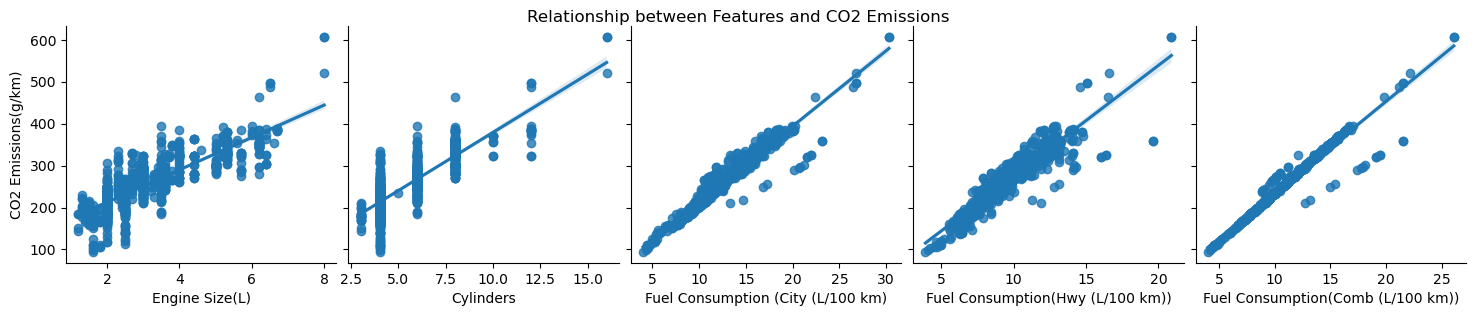

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data_viz = data[['Engine Size(L)', 'Cylinders', 'Fuel Consumption (City (L/100 km)', 
                 'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))', 
                 'CO2 Emissions(g/km)']]

sns.pairplot(data_viz, x_vars=['Engine Size(L)', 'Cylinders', 'Fuel Consumption (City (L/100 km)', 
                               'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))'], 
             y_vars='CO2 Emissions(g/km)', kind='reg', height=3)

plt.suptitle('Relationship between Features and CO2 Emissions', y=1.02)
plt.show()